In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 
path = 'Data/'

In [2]:
!ls -la

total 4144
drwxr-xr-x  14 sir  staff     448 Dec  7 14:47 .
drwxr-xr-x   9 sir  staff     288 Dec  2 16:02 ..
-rw-r--r--@  1 sir  staff    8196 Dec  6 12:29 .DS_Store
drwxr-xr-x  13 sir  staff     416 Nov 23 22:27 .git
drwxr-xr-x   8 sir  staff     256 Dec  6 14:47 .ipynb_checkpoints
-rw-r--r--   1 sir  staff   30167 Nov  2 01:48 A_B_Testing_Datacamp.ipynb
-rw-r--r--   1 sir  staff   93300 Nov  1 16:45 Bayes_exercise.ipynb
-rw-r--r--   1 sir  staff  761582 Nov 24 17:39 BayesianOptimization.ipynb
drwxr-xr-x   6 sir  staff     192 Dec  6 12:30 Data
drwxr-xr-x   4 sir  staff     128 Nov  3 14:53 ML
-rw-r--r--   1 sir  staff  612978 Dec  7 14:39 PCA_RandomForest_CV.ipynb
drwxr-xr-x   8 sir  staff     256 Nov 12 16:59 Pandas
-rw-r--r--   1 sir  staff    2289 Dec  6 12:26 README.md
-rw-r--r--   1 sir  staff  601841 Dec  7 14:47 ultimate_final.ipynb


In [3]:
df_logins = pd.read_json(path + 'logins.json')

## Part I

In [4]:
df_logins.info() #,df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [6]:
# Counter Column
df_logins['active'] = 1
# 
df_logins = df_logins.set_index(pd.DatetimeIndex(df_logins['login_time']), drop=True)
# 
# df_logins.drop('login_time', inplace=True, axis=1)

In [7]:
df_logins.head()

,login_time,active
login_time,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1
1970-01-01 20:16:10,1970-01-01 20:16:10,1
1970-01-01 20:16:37,1970-01-01 20:16:37,1
1970-01-01 20:16:36,1970-01-01 20:16:36,1
1970-01-01 20:26:21,1970-01-01 20:26:21,1


In [8]:
df_15 = df_logins.resample('15min', axis=0).sum()

In [9]:
df_15.describe().T

,count,mean,std,min,25%,50%,75%,max
active,9788.0,9.515938,8.328818,0.0,3.0,7.0,13.0,73.0


In [10]:
df_15.shape

(9788, 1)

<AxesSubplot:xlabel='login_time'>

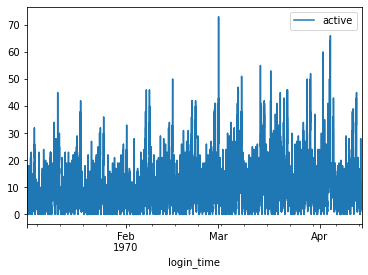

In [11]:
df_15.plot()

#### Plotting 15-minute intervals shows a significant variance; therefore, we could conclude this data may NOT be stationary.

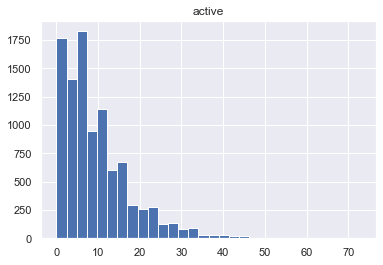

In [12]:
# 
sns.set()
df_15.hist(bins=30)
plt.show()
# NOT Normal distribution

#### It is very clear from our histogram above and this dataset is not Normally distributed.  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

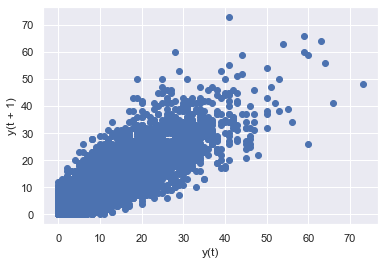

In [13]:
# import warnings
# warnings.filterwarnings('ignore')
# 
from pandas.plotting import lag_plot
# 
lag_plot(df_15['active'], lag=1)

#### I can state from the lag plot above and there is some upward trend. Also, this can validate that we are looking at a Non-stationary dataset.

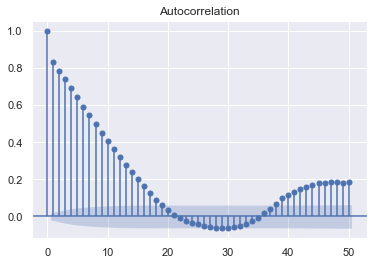

In [14]:
# from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Plot the acf function
plot_acf(df_15, lags=50)
plt.show()

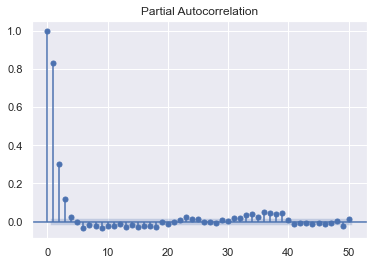

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
# 
plot_pacf(df_15.active, lags=50)
plt.show()

#### A starting model would be AR(3) model, according to PCF & PACF graph. 

### Aggregating per Day

In [16]:
df_day = df_logins.resample('d', axis=0).sum()

In [17]:
df_day.describe().T

,count,mean,std,min,25%,50%,75%,max
active,103.0,904.291262,347.167463,112.0,643.0,827.0,1141.0,1889.0


In [18]:
df_day.index.max(), df_day.index.min()

(Timestamp('1970-04-13 00:00:00', freq='D'),
 Timestamp('1970-01-01 00:00:00', freq='D'))

array([[<AxesSubplot:title={'center':'active'}>]], dtype=object)

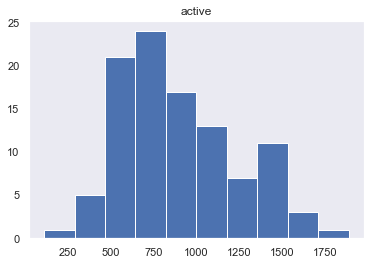

In [19]:
#  Lets look at daily
df_day.hist(grid=False)

#### Aggregating weekly is showing a somewhat normally distributed histogram but very skewed to the right.

<AxesSubplot:xlabel='login_time'>

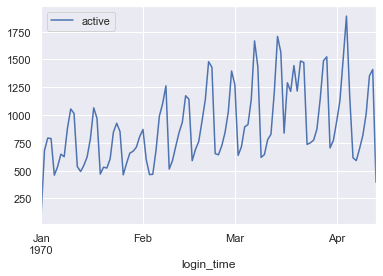

In [20]:
df_day.plot(linewidth=1.5)

#### The plot above shows a strong signs seasonality.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

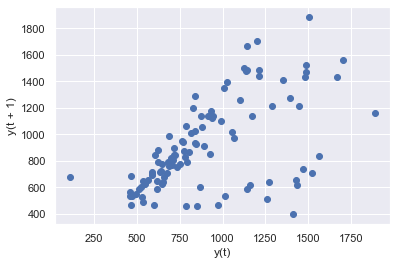

In [21]:
lag_plot(df_day['active'], lag=1)

#### looking from the lag plot above shows some upward trend.

## Part II: Experiment and metrics 
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

   1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
   - **The total amount or number of toll reimbursement activities, passenger wait times, and/or frequency of passenger pickup would add significant values to the current experiment. Also, I would monitor for fictitious reimbursement requests and develop a mechanism to detect any fraudulent requests to limit bias between wait time and toll reimbursement. The problem does not state the cause of this experiment, but I assume that passengers' long wait time is the cause; therefore, the frequency of passenger pickup rate is the critical metric.**
   2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
   - **A practical experiment would be a survey or an interview to determine the participation rate when all toll costs are reimbursed.**

#### a. how you will implement the experiment
- Clearly state the null hypothesis
- Define the test statistics 
- gather necessary data 
- Compute the test statistic

#### b. what statistical test(s) you will conduct to verify the significance of the observation
- A/B testing can be used to see if a toll reimburstment can provide a better result in passenger pickup rate.

#### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
- The interpretation will depend on our statistical results and null hypothesis, including any recommendations we derive from this experiment. This experiment may have no statistical significance in reducing rider lag time or passenger pickup rate even with the toll reimbursement program. Also, it can introduce fraud and many additional adverse effects by introducing higher traffic patterns between the two cities. 

In [22]:
# Import
df_ultimate = pd.read_json(path + 'ultimate_data_challenge.json')

In [23]:
df_ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [24]:
df_ultimate.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,41878.0,4.601559,0.617338,1.0,4.30,4.90,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,49799.0,4.778158,0.446652,1.0,4.70,5.00,5.00,5.00


In [25]:
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [26]:
df_ultimate.trips_in_first_30_days.value_counts(normalize=True).head()

0    0.30780
1    0.28216
2    0.14804
3    0.07576
4    0.05124
Name: trips_in_first_30_days, dtype: float64

#### 69% observed users were retained per trips_in_first_30_days column before dropping any nulls.
- remove missing value:
    - 72% users retained
    - missing values can be imputed
- engeering:
    - (df.last_trip_date - df.signup_date).view(int)
    - df.signup_date.view(int)
    - df.last_trip_date.view(int)
- modeling
    - will not be using under/over sampling 

### Pre-processing:

In [27]:
# create new DataFrame from csv import
df = df_ultimate[['city', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 
             'ultimate_black_user', 'weekday_pct', 'avg_dist','avg_rating_by_driver', 
             'phone', 'signup_date', 'last_trip_date', 'trips_in_first_30_days']]

In [28]:
# Date time conversion
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# new column from (df.last_trip_date - df.signup_date)
df['date_diff'] = (df.last_trip_date - df.signup_date).view(int)

# new columns from conversion
df['trip'] = df.last_trip_date.view(int)
df['signup'] = df.signup_date.view(int)

# remove columns
columns = ['signup_date', 'last_trip_date']
df.drop(columns, axis=1, inplace=True)

# update with 0 or 1 from bool
df.loc[df['trips_in_first_30_days'] > 0, 'trips_in_first_30_days'] = 1

# Convert to int from bool
df.ultimate_black_user = df.ultimate_black_user.astype(int)

# Set proper column names
df.rename({'trips_in_first_30_days': 'target'}, axis=1, inplace=True)

# Drop any missing values
df.dropna(inplace=True)
# 
df.target.value_counts(normalize=True).head()

1    0.721945
0    0.278055
Name: target, dtype: float64

In [29]:
# Convert categorical values into dummy variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,target,date_diff,trip,signup,city_King's Landing,city_Winterfell,phone_iPhone
0,4.7,1.10,15.4,1,46.2,3.67,5.0,1,12355200000000000,1402963200000000000,1390608000000000000,1,0,1
1,5.0,1.00,0.0,0,50.0,8.26,5.0,0,8294400000000000,1399248000000000000,1390953600000000000,0,0,0
2,4.3,1.00,0.0,0,100.0,0.77,5.0,1,86400000000000,1389052800000000000,1388966400000000000,0,0,1
3,4.6,1.14,20.0,1,80.0,2.36,4.9,1,14688000000000000,1404000000000000000,1389312000000000000,1,0,1
4,4.4,1.19,11.8,0,82.4,3.13,4.9,1,4060800000000000,1394841600000000000,1390780800000000000,0,1,0


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rating_of_driver,41445.0,4.601720e+00,6.161044e-01,1.000000e+00,4.300000e+00,4.900000e+00,5.000000e+00,5.000000e+00
avg_surge,41445.0,1.073822e+00,1.987472e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.070000e+00,8.000000e+00
surge_pct,41445.0,8.898709e+00,1.832206e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.110000e+01,1.000000e+02
ultimate_black_user,41445.0,3.840994e-01,4.863875e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
weekday_pct,41445.0,6.125490e+01,3.481385e+01,0.000000e+00,3.750000e+01,6.670000e+01,1.000000e+02,1.000000e+02
avg_dist,41445.0,5.460046e+00,5.145174e+00,0.000000e+00,2.420000e+00,3.780000e+00,6.490000e+00,7.969000e+01
avg_rating_by_driver,41445.0,4.776446e+00,4.046064e-01,1.000000e+00,4.700000e+00,5.000000e+00,5.000000e+00,5.000000e+00
target,41445.0,7.219447e-01,4.480462e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
date_diff,41445.0,8.476604e+15,5.287148e+15,0.000000e+00,3.283200e+15,1.019520e+16,1.313280e+16,1.563840e+16
trip,41445.0,1.398347e+18,5.253027e+15,1.388534e+18,1.393200e+18,1.400198e+18,1.403222e+18,1.404173e+18


<AxesSubplot:>

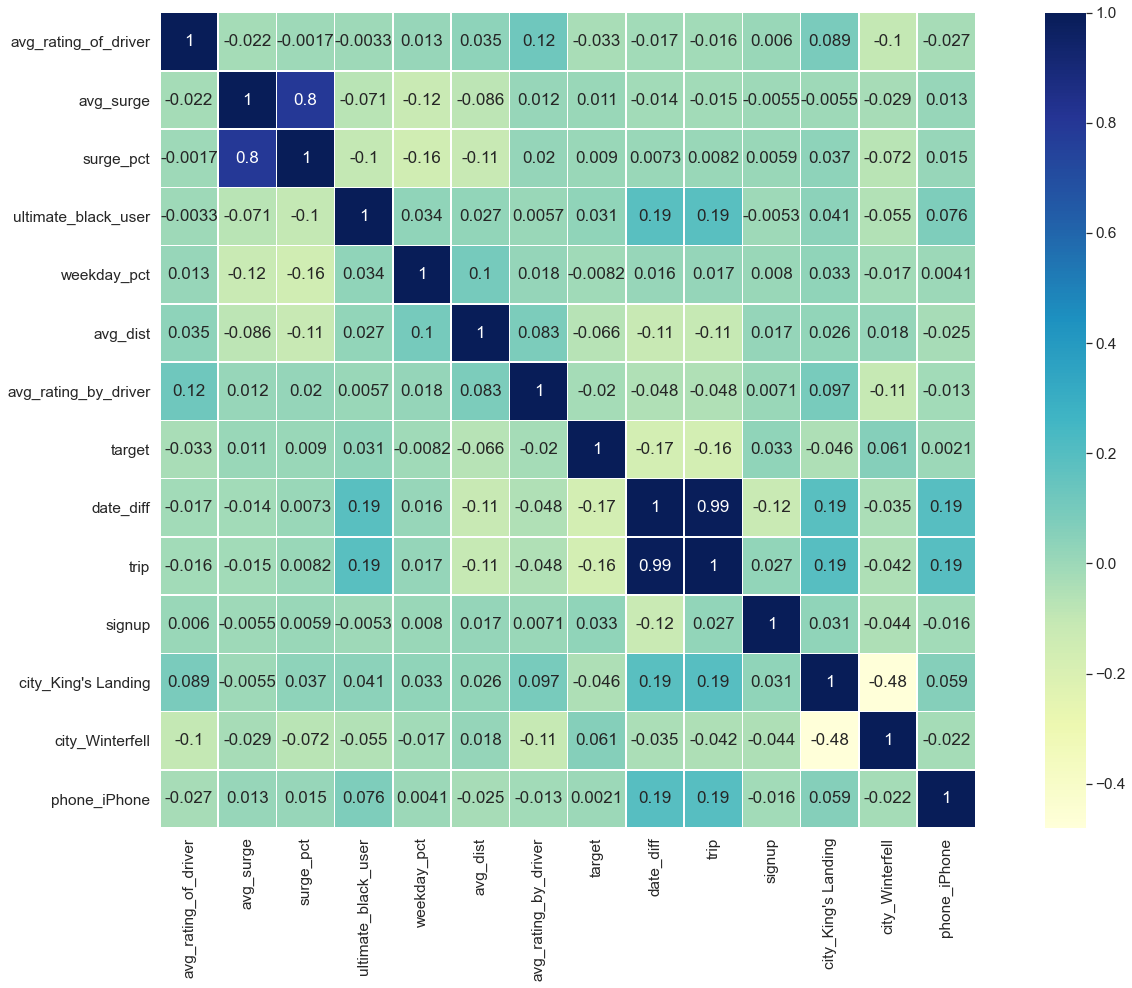

In [31]:
# # Make a heatmap of the data
plt.figure(figsize=(25,15))
sns.set(font_scale = 1.4)
sns.heatmap(df.corr() ,annot=True, linewidths=.5, annot_kws={"size":17}, 
            square=True, cmap='YlGnBu')

#### There is a strong positive correlation between surge_pct and avg_surge and  date_diff and trip, and the last_trip_date converted into an integer. So it seems redundant, and we discard trip & surge_pct features from our model in this exercise, but we should create a model without removing these two features and make comparisons.

In [32]:
# Remove columns that are highly correlated
columns = ['trip', 'surge_pct']
df.drop(columns, axis=1, inplace=True)
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_rating_of_driver  41445 non-null  float64
 1   avg_surge             41445 non-null  float64
 2   ultimate_black_user   41445 non-null  int64  
 3   weekday_pct           41445 non-null  float64
 4   avg_dist              41445 non-null  float64
 5   avg_rating_by_driver  41445 non-null  float64
 6   target                41445 non-null  int64  
 7   date_diff             41445 non-null  int64  
 8   signup                41445 non-null  int64  
 9   city_King's Landing   41445 non-null  uint8  
 10  city_Winterfell       41445 non-null  uint8  
 11  phone_iPhone          41445 non-null  uint8  
dtypes: float64(5), int64(4), uint8(3)
memory usage: 3.3 MB


#### PCA to determine importance of each features

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [34]:
cols_to_norm = ['avg_rating_of_driver', 'avg_surge', 'ultimate_black_user',
                'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'date_diff',
               'signup', "city_King's Landing", 'city_Winterfell', 'phone_iPhone']

scaler = StandardScaler()
df_norm = scaler.fit_transform(df[cols_to_norm])

In [35]:
df_norm[0:1]

array([[ 0.15951976,  0.13171821,  1.26629092, -0.43244511, -0.34791205,
         0.55252905,  0.73359831,  0.97645826,  1.92952764, -0.92728345,
         0.64187162]])

In [36]:
# update DataFrame with Scaled Data
df.loc[:,(cols_to_norm)] = df_norm

In [37]:
# validate Standard Scaler conversion
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_rating_of_driver,41445.0,-1.483298e-16,1.000012,-5.846028,-0.489729,0.484144,0.646456,0.646456
avg_surge,41445.0,4.569179e-16,1.000012,-0.371440,-0.371440,-0.371440,-0.019229,34.849610
ultimate_black_user,41445.0,3.077658e-17,1.000012,-0.789708,-0.789708,-0.789708,1.266291,1.266291
weekday_pct,41445.0,1.187988e-16,1.000012,-1.759519,-0.682349,0.156408,1.112936,1.112936
avg_dist,41445.0,2.279158e-16,1.000012,-1.061210,-0.590861,-0.326533,0.200181,14.427278
avg_rating_by_driver,41445.0,-1.138913e-15,1.000012,-9.333741,-0.188941,0.552529,0.552529,0.552529
target,41445.0,7.219447e-01,0.448046,0.000000,0.000000,1.000000,1.000000,1.000000
date_diff,41445.0,-9.980622e-17,1.000012,-1.603266,-0.982281,0.325056,0.880674,1.354583
signup,41445.0,-2.034848e-13,1.000012,-1.770180,-0.854634,0.060912,0.862015,1.663118
city_King's Landing,41445.0,-2.433067e-15,1.000012,-0.518262,-0.518262,-0.518262,-0.518262,1.929528


In [38]:
pca = PCA()
principalComponents = pca.fit_transform(df[cols_to_norm])

In [39]:
print(pca.explained_variance_ratio_)
var = pca.explained_variance_ratio_.cumsum()
print(var)

[0.14898219 0.12351295 0.11164544 0.09377486 0.08818108 0.08552838
 0.08278543 0.07859958 0.0765983  0.06661752 0.04377427]
[0.14898219 0.27249514 0.38414058 0.47791544 0.56609652 0.6516249
 0.73441033 0.81300991 0.88960821 0.95622573 1.        ]


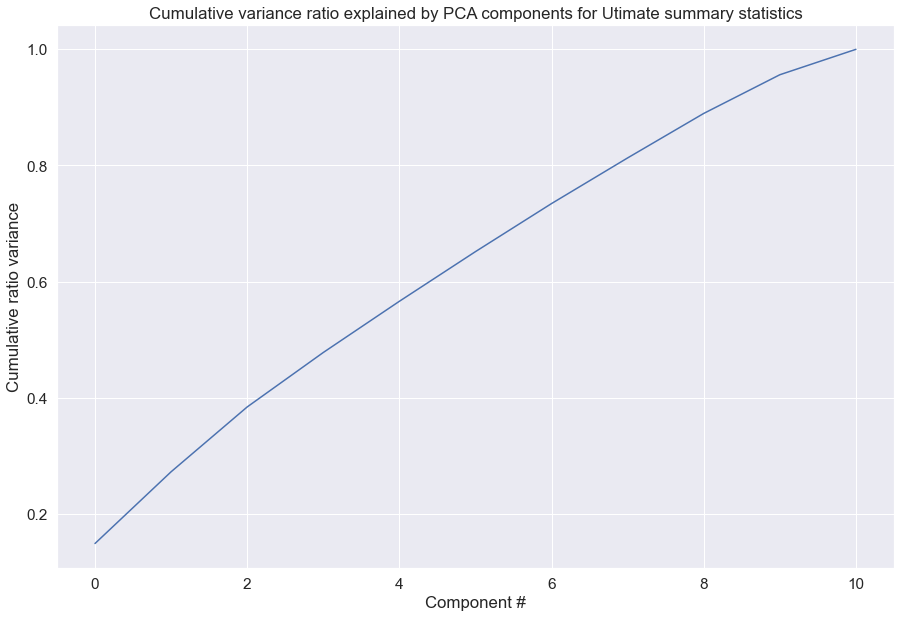

In [40]:
plt.figure(figsize=(15,10))
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Utimate summary statistics');
plt.plot(var)

### X & y exercise:

In [41]:
# X, y full data
y =  df['target']
X =  df.loc[:, df.columns != 'target']
# 
seed = 44
# 
y.value_counts()

1    29921
0    11524
Name: target, dtype: int64

In [42]:
# Split training & test
from sklearn.model_selection import train_test_split
# training 75% & 25% testing data - stratify used to maintain same balance
t_size=0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=seed, stratify=y)

#### User Matrics Function

In [43]:
def scoring_model(model, X_train, X_test, y_train, y_test, y_pred):
    # Import
    from sklearn.metrics import accuracy_score, auc, roc_auc_score, roc_curve
    #
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, 
                                                                    model.predict_proba(X_train)[:,1])
    #
    tr_score = model.score(X_train, y_train)
    ts_score = model.score(X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    auc = auc(false_positive_rate, true_positive_rate)
    roc_tr = roc_auc_score(y_train, model.predict(X_train))
    roc_t = roc_auc_score(y_test, model.predict(X_test))
    return tr_score,ts_score,acc,auc,roc_tr,roc_t

#### Dummy Classifier

In [44]:
from sklearn.dummy import DummyClassifier
# 
dummy_clf = DummyClassifier(strategy="stratified")
# 
dummy_clf.fit(X_train, y_train)
# 
dummy_clf.predict(X_test)
# 
dummy_clf.score(X_test, y_test)

0.5968924917969504

#### Modeling a Dummy Classifier provides 60% accuracy using a stratified as a baseline score.
- Random Forest with Grid Search & CV using StratifiedKFold **82.146%**
- AdaBoost couple Decision Tree as base estimator with Grid Search & CV using StratifiedKFold **82.069%**

I've created multiple models, and every model outperformed the base model, which stood at 60%. Therefore, I can only recommend the best-performing model by accuracy score, but maybe a business case for sensitivity to Type I or Type II error.

##### Top 5 features used by each model
- AdaBoost:
    - weekday_pct
    - avg_rating_by_driver
    - avg_surge
    - date_diff
    - avg_rating_of_driver

- Random Forest:
    - date_diff              
    - avg_dist               
    - weekday_pct            
    - signup
    - avg_rating_by_driver
    
<br>
The above list contains the top 5 essential features, and some parts are repeating in all three models, which may help determine areas to improve. 
</br>

#### Modeling:
    - LogisticRegression & Random Forest & AdaBoost

In [45]:
# Load libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

### Logistic Regression

Accuracy: 0.7251495850221965
              precision    recall  f1-score   support

           0       0.63      0.03      0.05      2881
           1       0.73      0.99      0.84      7481

    accuracy                           0.73     10362
   macro avg       0.68      0.51      0.45     10362
weighted avg       0.70      0.73      0.62     10362

81 2800 48 7433


Training set score:         0.7231605701
Test set score:             0.7251495850
Accuracy Test set Score:    0.7251495850
AUC Score:                  0.6254824286
ROC AUC Training set Score: 0.5070712149
ROC AUC Test set Score:     0.5108494916




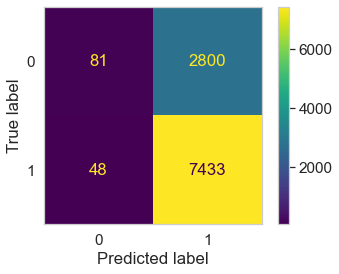

In [46]:
# remove grids on ConfusionMatrixDisplay
sns.set_style("whitegrid", {'axes.grid' : False})
# 
params = {'random_state' : seed,
          'multi_class' : 'ovr',
          'n_jobs' : (-1),
          }

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression(**params)

# Fit model
logisticRegr.fit(X_train, y_train)

# Predict for test dataset
y_pred = logisticRegr.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
# 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
# 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logisticRegr.classes_)
disp.plot()
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(logisticRegr, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 

- TN “true negative” The values which were actually negative and were predicted negative.
- FP “false positive” The values which were actually negative but falsely predicted as positive. Type I Error
- FN “false negative” The values which were actually positive but falsely predicted as negative. Type II Error
- TP “true positive” The values which were actually positive and were predicted positive

#### AdaBoost Classifier

Accuracy: 0.8137425207488902


              precision    recall  f1-score   support

           0       0.72      0.54      0.62      2881
           1       0.84      0.92      0.88      7481

    accuracy                           0.81     10362
   macro avg       0.78      0.73      0.75     10362
weighted avg       0.81      0.81      0.80     10362

                      AdaBoost %-importance
weekday_pct                            0.48
avg_rating_by_driver                   0.20
avg_surge                              0.12
date_diff                              0.12
avg_rating_of_driver                   0.08
ultimate_black_user                    0.00
avg_dist                               0.00
signup                                 0.00
city_King's Landing                    0.00
city_Winterfell                        0.00
phone_iPhone                           0.00


Training set score:         0.8123089792
Test set score:             0.8137425207
Accuracy Test set Score:    0.

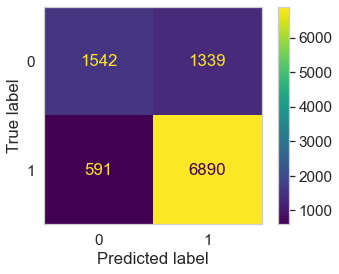

In [47]:
# AdaBoost: Plain
params_ada = {'random_state' : seed,
          'n_estimators' : 50,
          'learning_rate' : 0.1,
          }

# Create a AdaBoost Classifier
abc = AdaBoostClassifier(**params_ada)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
# 
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abc.classes_)
disp.plot()
df = pd.DataFrame(abc.feature_importances_, index=X_test.columns, columns=["AdaBoost %-importance"])
print(df.sort_values("AdaBoost %-importance", axis=0, ascending=False))
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(model, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 

#### AdaBoost with Decision Tree as base estimator 

Fitting 5 folds for each of 160 candidates, totalling 800 fits
CPU times: user 13 s, sys: 704 ms, total: 13.7 s
Wall time: 19min 43s
Accuracy: 0.8206909862960818


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         min_samples_leaf=10),
                   learning_rate=0.01, n_estimators=250)


              precision    recall  f1-score   support

           0       0.73      0.56      0.64      2881
           1       0.85      0.92      0.88      7481

    accuracy                           0.82     10362
   macro avg       0.79      0.74      0.76     10362
weighted avg       0.81      0.82      0.81     10362



Training set score:         0.8887560575
Test set score:             0.8810651645
Accuracy Test set Score:    0.8206909863
AUC Score:                  0.8945085644
ROC AUC Training set Score: 0.7563056500
ROC AUC Test set Score:     0.7414647246




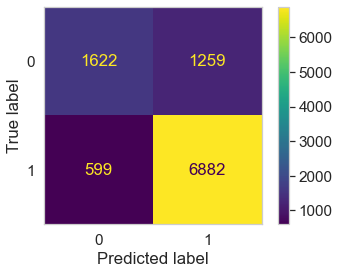

In [48]:
# Create a AdaBoost Classifier
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())
# 
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)
# 
parameters = {'base_estimator__max_depth':[i for i in range(2,11,2)],
              'base_estimator__min_samples_leaf':[5,10],
              'n_estimators':[10,50,250,1000],
              'learning_rate':[0.01,0.1,0.5,1.0]}

clf = GridSearchCV(abc, parameters,verbose=3,cv=skf.split(X_train, y_train),scoring='f1',n_jobs=-1)
# 
%time clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(clf.best_estimator_)
print('\n')
print(classification_report(y_test, y_pred))
# plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(clf, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 

#### AdaBoost with Random Search

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: user 1.86 s, sys: 190 ms, total: 2.05 s
Wall time: 33.3 s


Accuracy: 0.8137425207488902


AdaBoostClassifier(learning_rate=0.5, n_estimators=94, random_state=44)


              precision    recall  f1-score   support

           0       0.70      0.59      0.64      2881
           1       0.85      0.90      0.87      7481

    accuracy                           0.81     10362
   macro avg       0.77      0.74      0.76     10362
weighted avg       0.81      0.81      0.81     10362



Training set score:         0.8171991121
Test set score:             0.8137425207
Accuracy Test set Score:    0.8137425207
AUC Score:                  0.8693086561
ROC AUC Training set Score: 0.7477672730
ROC AUC Test set Score:     0.7443360041




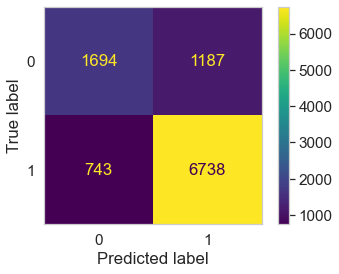

In [49]:
params_ada = {'random_state' : seed,
          'n_estimators' : 50,
          'learning_rate' : 1,
          }

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
learning_rate = [0.01, 0.1, 0.5, 1]

random_abc = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

# Create a AdaBoost Classifier
abc = AdaBoostClassifier(**params_ada)
# 

abc_random = RandomizedSearchCV(estimator = abc, param_distributions = random_abc, n_iter = 40, 
                                cv = 5, verbose=2, random_state=seed, n_jobs = -1)

# Train Adaboost Classifer
%time model = abc_random.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(abc_random.best_estimator_)
print('\n')
print(classification_report(y_test, y_pred))
# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(abc_random, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 

#### AdaBoost with Grid Search

Fitting 5 folds for each of 40 candidates, totalling 200 fits
CPU times: user 2.95 s, sys: 212 ms, total: 3.16 s
Wall time: 34.3 s


Accuracy: 0.8164447017950203


AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=44)


              precision    recall  f1-score   support

           0       0.71      0.57      0.64      2881
           1       0.85      0.91      0.88      7481

    accuracy                           0.82     10362
   macro avg       0.78      0.74      0.76     10362
weighted avg       0.81      0.82      0.81     10362



Training set score:         0.8779304422
Test set score:             0.8773852501
Accuracy Test set Score:    0.8164447018
AUC Score:                  0.8667876960
ROC AUC Training set Score: 0.7419515948
ROC AUC Test set Score:     0.7420455319




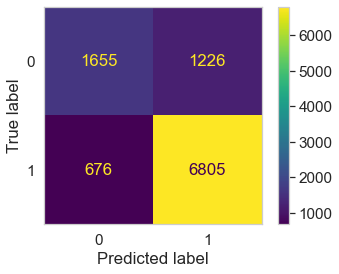

In [50]:
params_ada = {'random_state' : seed,
          'n_estimators' : 50,
          'learning_rate' : 1,
          }

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
learning_rate = [0.01, 0.1, 0.5, 1]

parameters = {'n_estimators': n_estimators,
               'learning_rate': learning_rate}

# Create a AdaBoost Classifier
abc = AdaBoostClassifier(**params_ada)
# 
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)
# 
abc_grid = GridSearchCV(abc, parameters,verbose=3,cv=skf.split(X_train, y_train),scoring='f1',n_jobs=-1)

# Train Adaboost Classifer
%time model = abc_grid.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(abc_grid.best_estimator_)
print('\n')
print(classification_report(y_test, y_pred))
# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(abc_grid, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 

#### Random Forest Classifier

CPU times: user 3.85 s, sys: 88 ms, total: 3.93 s
Wall time: 410 ms
Accuracy: 0.8099787685774947


              precision    recall  f1-score   support

           0       0.69      0.57      0.63      2881
           1       0.85      0.90      0.87      7481

    accuracy                           0.81     10362
   macro avg       0.77      0.74      0.75     10362
weighted avg       0.80      0.81      0.80     10362



                      RFC %-importance
date_diff                     0.323881
avg_dist                      0.165961
weekday_pct                   0.137326
signup                        0.115416
avg_rating_by_driver          0.077754
avg_rating_of_driver          0.061583
avg_surge                     0.058794
ultimate_black_user           0.016950
phone_iPhone                  0.016674
city_Winterfell               0.013864
city_King's Landing           0.011796


Training set score:         0.9999678281
Test set score:             0.8099787686
Accuracy Test set Sc

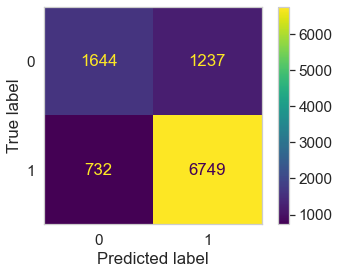

In [51]:
# Randoom Forest Plain
params = {'n_jobs' : (-1),
          'random_state' : seed,
          }
# 
rfc = RandomForestClassifier(**params)
# 
%time rfc.fit(X_train, y_train)
# 
y_pred = rfc.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
df = pd.DataFrame(rfc.feature_importances_, index=X_test.columns, columns=["RFC %-importance"])
print(df.sort_values("RFC %-importance", axis=0, ascending=False))
# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(rfc, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 

#### Rabdom Forest with Grid Search & CV using StratifiedKFold: Winner!!!

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 10.9 s, sys: 665 ms, total: 11.6 s
Wall time: 5min 26s


Accuracy: 0.8214630380235476


RandomForestClassifier(max_depth=16, min_samples_leaf=6, min_samples_split=20,
                       n_estimators=325, n_jobs=-1, random_state=44)


Training set score:         0.8586365537
Test set score:             0.8214630380
Accuracy Test set Score:    0.8214630380
AUC Score:                  0.9328798505
ROC AUC Training set Score: 0.7937879546
ROC AUC Test set Score:     0.7457344328




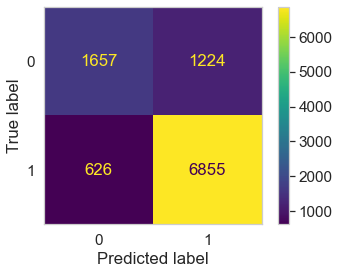

In [52]:
# Randoom Forest
params = {'n_jobs' : (-1),
          'random_state' : seed,
          }
# 
#Create a Random Forest Classifier
rfc = RandomForestClassifier(**params)

# RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 250, stop = 400, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4, 6, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# 
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, random_state=seed, shuffle=True)
# 
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, 
                                cv = skf.split(X_train, y_train), verbose=2, random_state=seed, n_jobs = -1)
# 
%time rfc_random.fit(X_train, y_train)
# 
y_pred = rfc_random.predict(X_test)
# Model Accuracy
print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(rfc_random.best_estimator_)
# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_random.classes_)
disp.plot()
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(rfc_random, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 

#### AdaBoost with Random Forest

Accuracy: 0.8120054043620922


              precision    recall  f1-score   support

           0       0.72      0.53      0.61      2881
           1       0.84      0.92      0.88      7481

    accuracy                           0.81     10362
   macro avg       0.78      0.72      0.74     10362
weighted avg       0.80      0.81      0.80     10362



Training set score:         0.9999678281
Test set score:             0.8120054044
Accuracy Test set Score:    0.8120054044
AUC Score:                  0.9999999974
ROC AUC Training set Score: 0.9999777184
ROC AUC Test set Score:     0.7245645697




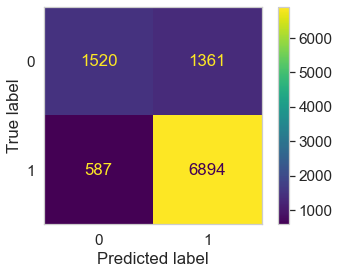

In [53]:
# Randoom Forest
params = {'n_jobs' : (-1),
          'random_state' : seed,
          }
# 
#Create a Random Forest Classifier
rfc = RandomForestClassifier(**params)
# 
abc_rf = AdaBoostClassifier(n_estimators=50, base_estimator=rfc,learning_rate=1)
# Train Adaboost Classifer
model = abc_rf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('\n')
print(classification_report(y_test, y_pred))
# plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
print('\n')
# 
training_score,test_score,accuracy_score,auc_score,roc_auc_train,roc_auc_test = \
                    scoring_model(abc_rf, X_train, X_test,y_train, y_test, y_pred)
# print the scores on training and test set
print('Training set score:         {:.10f}'.format(training_score))
print('Test set score:             {:.10f}'.format(test_score))
print('Accuracy Test set Score:    {:.10f}'.format(accuracy_score))
print('AUC Score:                  {:.10f}'.format(auc_score))
print('ROC AUC Training set Score: {:.10f}'.format(roc_auc_train))
print('ROC AUC Test set Score:     {:.10f}'.format(roc_auc_test))
print('\n')
# 